# Plot Ficture from sdata

In [1]:
import os

import pandas as pd
import spatialdata

# import spatialdata_io

/dss/dsshome1/0C/ra98gaq/miniconda3/envs/sdata/lib/python3.11/site-packages/dask/dataframe/__init__.py:31: FutureWarning: The legacy Dask DataFrame implementation is deprecated and will be removed in a future version. Set the configuration option `dataframe.query-planning` to `True` or None to enable the new Dask Dataframe implementation and silence this warning.
  warnings.warn(


In [85]:
import datetime

today = datetime.datetime.now().strftime("%Y%m%d")

In [2]:
data_dir = os.path.abspath("/home/data")
!ls -l $data_dir

lrwxrwxrwx 1 ra98gaq pn52ra 53 Mar 12 17:01 /home/data -> /dss/dssfs03/pn52re/pn52re-dss-0001/cellseg-benchmark


In [3]:
archive_dir = os.path.abspath("/home/archive")
!ls -l $archive_dir

lrwxrwxrwx 1 ra98gaq pn52ra 35 Mar 12 17:02 /home/archive -> /dss/dssfs03/pn52re/pn52re-dss-0000


In [4]:
cohort_name = "foxf2"
slide_name = "s2"
region_name = "r1"
sample_name = f"{cohort_name}_{slide_name}_{region_name}"
sdata_file = os.path.join(
    data_dir, "samples", sample_name, "results", "Ficture", "sdata.zarr"
)

In [5]:
output_name = os.path.join("20240322_mousebrain-Slide02-cp-WT-PCKO", "region_1")
merfish_output = os.path.join(
    archive_dir, "202402-Foxf2", "merfish_output", output_name
)

In [6]:
factor = "nF21"
factor_name = "nF21.d_6-bulkRNAseq-exclMBP"

In [7]:
sdata = spatialdata.read_zarr(sdata_file)

In [88]:
output_dir = os.path.join(data_dir, "samples", sample_name, "plots")
os.makedirs(output_dir, exist_ok=True)

In [8]:
sdata

SpatialData object, with associated Zarr store: /dss/dssfs03/pn52re/pn52re-dss-0001/cellseg-benchmark/samples/foxf2_s2_r1/results/Ficture/sdata.zarr
├── Points
│     ├── 'foxf2_s2_r1_all_transcript_factors': DataFrame with shape: (<Delayed>, 13) (2D points)
│     ├── 'foxf2_s2_r1_nF5_pixel_factors': DataFrame with shape: (<Delayed>, 11) (2D points)
│     ├── 'foxf2_s2_r1_nF10_pixel_factors': DataFrame with shape: (<Delayed>, 11) (2D points)
│     ├── 'foxf2_s2_r1_nF20_pixel_factors': DataFrame with shape: (<Delayed>, 11) (2D points)
│     ├── 'foxf2_s2_r1_nF21_pixel_factors': DataFrame with shape: (<Delayed>, 11) (2D points)
│     ├── 'foxf2_s2_r1_nF25_pixel_factors': DataFrame with shape: (<Delayed>, 11) (2D points)
│     ├── 'foxf2_s2_r1_nF28_pixel_factors': DataFrame with shape: (<Delayed>, 11) (2D points)
│     ├── 'foxf2_s2_r1_nF30_pixel_factors': DataFrame with shape: (<Delayed>, 11) (2D points)
│     ├── 'foxf2_s2_r1_nF50_pixel_factors': DataFrame with shape: (<Delayed>, 11) (2D

## Plot Ficture pixels 
need to figure out coordinate transfor for this!

In [9]:
sdata[f"{sample_name}_{factor}_pixel_factors"].compute().shape

(63482544, 11)

In [10]:
sdata[f"{sample_name}_{factor}_pixel_factors"].head(3)

,#BLOCK,X_px,Y_px,K1,K2,K3,P1,P2,P3,x,y
0,0,199977,52892,17,16,13,1.0,1.370000e-56,1.300000e-56,2173.69,481.49
1,0,199998,52992,17,0,3,1.0,4.490000e-55,2.410000e-55,2173.90,482.49
2,0,199977,53103,17,14,3,1.0,9.690000e-56,3.680000e-56,2173.69,483.60


## Plot Ficture-assigned transcripts

NOTE inconsistencies regarding plotting method - offset with `method="datashader"`` for render_shapes. Should report this as issue, but need to reproduce with their datsets first. For now, use method "matplotlib" instead

In [11]:
import matplotlib.patches as patches
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [12]:
sdata[f"{sample_name}_all_transcript_factors"].head(2)

,x,y,global_z,gene,transcript_id,nF50_factors,nF28_factors,nF10_factors,nF30_factors,nF5_factors,nF25_factors,nF21_factors,nF20_factors
0,7136.4756,2356.3298,0.0,Igf2,ENSMUST00000000033,50,28,10,30,5,25,21,20
1,7138.1094,2360.3838,0.0,Cfp,ENSMUST00000001156,50,28,10,30,5,25,21,20


In [13]:
sdata[f"{sample_name}_transcripts"].head(2)

,x,y,gene,global_z,transcript_id,fov,barcode_id,cell_id,Unnamed: 0
0,7136.4756,2356.3298,Igf2,0.0,ENSMUST00000000033,461,0,1865558700069100825,107
1,7138.1094,2360.3838,Cfp,0.0,ENSMUST00000001156,461,8,1865558700069100825,22


In [14]:
sdata[f"{sample_name}_polygons"].head(2)

,ID,EntityID,ZIndex,geometry,Type,ZLevel,Name,ParentID,ParentType
EntityID,,,,,,,,,
1865558700002100001,1240,1865558700002100001,0,"MULTIPOLYGON (((1683.208 144.984, 1683.891 142...",cell,1.5,None,None,None
1865558700002100002,1241,1865558700002100002,0,"MULTIPOLYGON (((1724.923 140.017, 1728.079 140...",cell,1.5,None,None,None


In [15]:
# prepare factor labels for plotting
# convert factor labels to categories
# sdata[f'{sample_name}_all_transcript_factors'] = sdata[f'{sample_name}_all_transcript_factors'].categorize(columns=f'{factor}_factors')

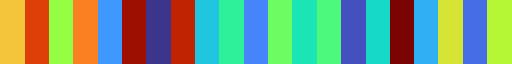

In [16]:
# get original FICTURE colormap for each factor
ficture_dex_file = os.path.join(
    data_dir,
    "samples",
    sample_name,
    "results",
    "Ficture",
    "output",
    f"{factor_name}",
    f"{factor}.d_6.prj_6.r_4_5.factor.info.tsv",
)
ficture_dex = pd.read_table(ficture_dex_file)
factor_color_code = ficture_dex["RGB"]
colors = [
    [float(c) / 255 for c in factor_color_code[factor].split(",")]
    for factor in range(int(factor.replace("nF", "")))
]
cmap = ListedColormap(colors)
cmap

'/home/data/samples/foxf2_s2_r1/results/Ficture/analysis/20250212_factor_annotations.csv'

In [96]:
# plot colors from UMAP / cell type annotations

# load nF21 annotation
ficture_annotations = pd.read_csv(
    os.path.join(
        data_dir,
        "samples",
        sample_name,
        "results",
        "Ficture",
        "analysis",
        "factor_annotation",
        "20250212_factor_annotations.csv",
    )
)
ficture_annotations = ficture_annotations[
    ficture_annotations["factor_method"] == factor
].sort_values(by="factor")

# slightly adjusted to match factor names
cell_type_colors = {
    "ECs": "#FF6464",  #
    "SMCs-Pericytes": "#F6EC2A",  #
    "SMCs": "#29FBA7",  #
    "Fibroblasts": "#85B0F9",  #
    "Ependymal": "#FDC000",  #
    "Choroid Plexus": "#BF9800",
    "Astrocytes": "#FE9A30",  #
    "Oligodendrocytes": "#4564FF",  #
    "OPCs": "#2024FF",  #
    "Microglia": "#00C088",  #
    "Macrophages": "#00F3D8",  #
    "Immune": "#98DF8A",  #
    "Neurons-Gaba": "#B449F8",  #
    "Neurons-Glut": "#CEB3FF",  #
    "Neurons-Dopa": "#FCA0FF",  #
    "Neurons-Immature": "#FCA0FF",  #
    "Neurons-Other": "#FCA0FF",  #
    "Unassigned": "#BDBDBD",  #
    "Astrocyte-Immune": "#FE9A30",  #
}

ficture_annotations["color"] = ficture_annotations["cell_type"].map(cell_type_colors)

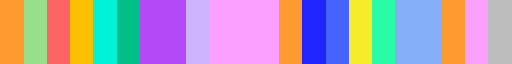

In [97]:
colors = ficture_annotations["color"]  # .unique()
cmap = ListedColormap(colors)
cmap

In [98]:
ficture_annotations

,factor_method,factor,cell_type,confidence,input_cell_type,color
154,nF21,0,Astrocytes,high,Astrocytes,#FE9A30
155,nF21,1,Immune,high,BAMs,#98DF8A
156,nF21,2,ECs,high,ECs,#FF6464
157,nF21,3,Ependymal,high,Ependymal,#FDC000
158,nF21,4,Macrophages,medium,Immune-Other,#00F3D8
159,nF21,5,Microglia,medium,Microglia,#00C088
160,nF21,6,Neurons-Gaba,high,Neurons-Dopa-Gaba,#B449F8
161,nF21,7,Neurons-Gaba,high,Neurons-Gaba,#B449F8
162,nF21,8,Neurons-Glut,high,Neurons-Glut,#CEB3FF
163,nF21,9,Neurons-Other,medium,Neurons-Glyc-Gaba,#FCA0FF


In [93]:
# subset transcripts for fast plotting
sdata[f"{sample_name}_all_transcript_factors_sub"] = sdata[
    f"{sample_name}_all_transcript_factors"
].sample(frac=0.1)
# sdata['slide2_region1_transcripts_sub'] = sdata['slide2_region1_transcripts'].sample(frac=0.0001)

/dss/dsshome1/0C/ra98gaq/miniconda3/envs/sdata/lib/python3.11/site-packages/spatialdata/_core/_elements.py:115: UserWarning: Key `foxf2_s2_r1_all_transcript_factors_sub` already exists. Overwriting it in-memory.
  self._check_key(key, self.keys(), self._shared_keys)


In [59]:
sdata[f"{sample_name}_polygons_sub"] = sdata[f"{sample_name}_polygons"].sample(
    frac=0.00001
)
# sdata['slide2_region1_polygons_sub'] = sdata['slide2_region1_polygons'].sample(frac=0.0001)

INFO     Using 'datashader' backend with 'None' as reduction method to speed up plotting. Depending on the         
         reduction method, the value range of the plot might change. Set method to 'matplotlib' do disable this    
         behaviour.                                                                                                


/dss/dsshome1/0C/ra98gaq/miniconda3/envs/sdata/lib/python3.11/site-packages/anndata/_core/anndata.py:401: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
/dss/dsshome1/0C/ra98gaq/miniconda3/envs/sdata/lib/python3.11/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/dss/dsshome1/0C/ra98gaq/miniconda3/envs/sdata/lib/python3.11/site-packages/spatialdata/_core/_elements.py:115: UserWarning: Key `foxf2_s2_r1_all_transcript_factors_sub` already exists. Overwriting it in-memory.
  self._check_key(key, self.keys(), self._shared_keys)


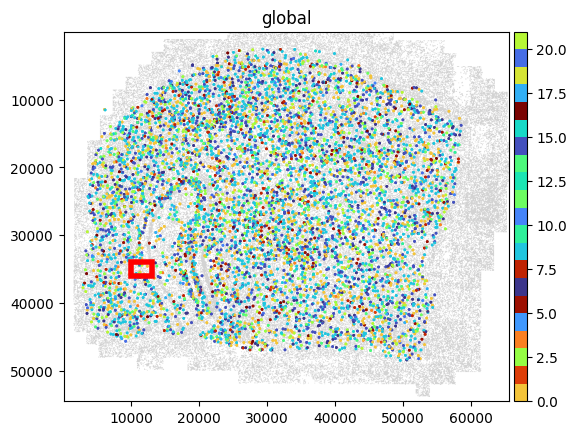

In [49]:
# plot cell segmentations and transcripts on whole slide
f, ax = plt.subplots()
sdata.pl.render_shapes(
    f"{sample_name}_polygons",
    # outline = True, method = "matplotlib"
).pl.render_points(
    f"{sample_name}_all_transcript_factors_sub",
    color=f"{factor}_factors",
    cmap=cmap,
    method="matplotlib",
).pl.show(ax=ax)
# ROI border
rect = patches.Rectangle(
    (bb_xmin, bb_ymin), bb_w, bb_h, linewidth=4, edgecolor="red", facecolor="none"
)
ax.add_patch(rect)

In [99]:
vname = "full_slide"
plot = sdata.pl.render_points(
    f"{sample_name}_all_transcript_factors_sub",
    color=f"{factor}factors",
    cmap=cmap,
    size=0.1,
    method="matplotlib",
)
fig = plot.pl.show(figsize=(18, 18))
plt.savefig(
    os.path.join(output_dir, f"{today}_Ficture_{vname}.png"),
    dpi=500,
    bbox_inches="tight",
    pad_inches=0.2,
    transparent=True,
)
plt.close()

/dss/dsshome1/0C/ra98gaq/miniconda3/envs/sdata/lib/python3.11/site-packages/anndata/_core/anndata.py:401: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
/dss/dsshome1/0C/ra98gaq/miniconda3/envs/sdata/lib/python3.11/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/dss/dsshome1/0C/ra98gaq/miniconda3/envs/sdata/lib/python3.11/site-packages/spatialdata/_core/_elements.py:115: UserWarning: Key `foxf2_s2_r1_all_transcript_factors_sub` already exists. Overwriting it in-memory.
  self._check_key(key, self.keys(), self._shared_keys)
/dss/dsshome1/0C/ra98gaq/miniconda3/envs/sdata/lib/python3.11/site-packages/spatialdata_plot/pl/render.py:669: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = ax.scatter(

KeyboardInterrupt



Error in callback <function flush_figures at 0x7fd5154459e0> (for post_execute), with arguments args (),kwargs {}:



KeyboardInterrupt



In [60]:
# define bounding box for spatial query for high res plotting
bb_xmin = 10000
bb_ymin = 34000
bb_w = 3000
bb_h = 2000
bb_xmax = bb_xmin + bb_w
bb_ymax = bb_ymin + bb_h

In [ ]:
# spatial crop of sdata to enable high-res plotting
cropped_sdata = sdata.query.bounding_box(
    axes=["x", "y"],
    min_coordinate=[bb_xmin, bb_ymin],
    max_coordinate=[bb_xmax, bb_ymax],
    target_coordinate_system="global",
)
cropped_sdata

/dss/dsshome1/0C/ra98gaq/miniconda3/envs/sdata/lib/python3.11/site-packages/anndata/_core/anndata.py:401: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
/dss/dsshome1/0C/ra98gaq/miniconda3/envs/sdata/lib/python3.11/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/dss/dsshome1/0C/ra98gaq/miniconda3/envs/sdata/lib/python3.11/site-packages/spatialdata/_core/_elements.py:115: UserWarning: Key `foxf2_s2_r1_all_transcript_factors` already exists. Overwriting it in-memory.
  self._check_key(key, self.keys(), self._shared_keys)


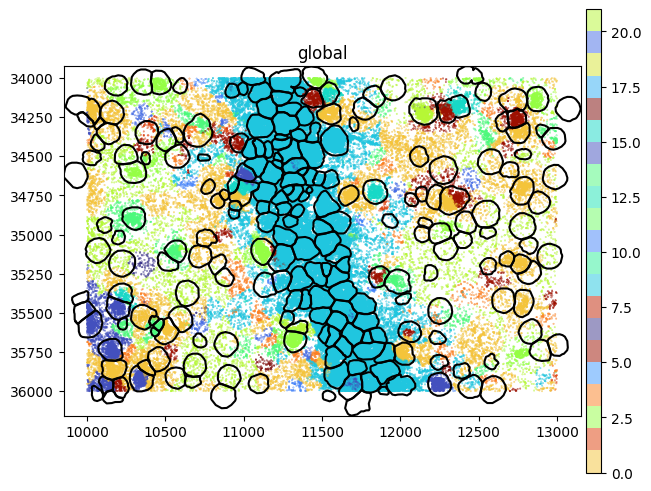

In [52]:
cropped_sdata.pl.render_points(
    f"{sample_name}_all_transcript_factors",
    color=f"{factor}_factors",
    cmap=cmap,
    method="matplotlib",
    alpha=0.5,
    size=0.1,
).pl.render_shapes(
    f"{sample_name}_polygons", outline_alpha=1, outline_color="black", fill_alpha=0
).pl.show()

In [62]:
# define bounding box for spatial query for high res plotting
bb_xmin = 55750
bb_ymin = 15400
bb_w = 3000
bb_h = 1200
bb_xmax = bb_xmin + bb_w
bb_ymax = bb_ymin + bb_h

In [63]:
# spatial crop of sdata to enable high-res plotting
cropped_sdata = sdata.query.bounding_box(
    axes=["x", "y"],
    min_coordinate=[bb_xmin, bb_ymin],
    max_coordinate=[bb_xmax, bb_ymax],
    target_coordinate_system="global",
)
cropped_sdata

/dss/dsshome1/0C/ra98gaq/miniconda3/envs/sdata/lib/python3.11/functools.py:909: UserWarning: The object has `points` element. Depending on the number of points, querying MAY suffer from performance issues. Please consider filtering the object before calling this function by calling the `subset()` method of `SpatialData`.
  return dispatch(args[0].__class__)(*args, **kw)


SpatialData object
├── Points
│     ├── 'foxf2_s2_r1_all_transcript_factors': DataFrame with shape: (<Delayed>, 13) (2D points)
│     ├── 'foxf2_s2_r1_all_transcript_factors_sub': DataFrame with shape: (<Delayed>, 13) (2D points)
│     └── 'foxf2_s2_r1_transcripts': DataFrame with shape: (<Delayed>, 9) (2D points)
├── Shapes
│     ├── 'Proseg_2D_boundaries': GeoDataFrame shape: (173, 2) (2D shapes)
│     └── 'foxf2_s2_r1_polygons': GeoDataFrame shape: (152, 9) (2D shapes)
└── Tables
      └── 'table': AnnData (152, 500)
with coordinate systems:
    ▸ 'global', with elements:
        foxf2_s2_r1_all_transcript_factors (Points), foxf2_s2_r1_all_transcript_factors_sub (Points), foxf2_s2_r1_transcripts (Points), Proseg_2D_boundaries (Shapes), foxf2_s2_r1_polygons (Shapes)

/dss/dsshome1/0C/ra98gaq/miniconda3/envs/sdata/lib/python3.11/site-packages/anndata/_core/anndata.py:401: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
/dss/dsshome1/0C/ra98gaq/miniconda3/envs/sdata/lib/python3.11/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/dss/dsshome1/0C/ra98gaq/miniconda3/envs/sdata/lib/python3.11/site-packages/spatialdata/_core/_elements.py:115: UserWarning: Key `foxf2_s2_r1_all_transcript_factors` already exists. Overwriting it in-memory.
  self._check_key(key, self.keys(), self._shared_keys)


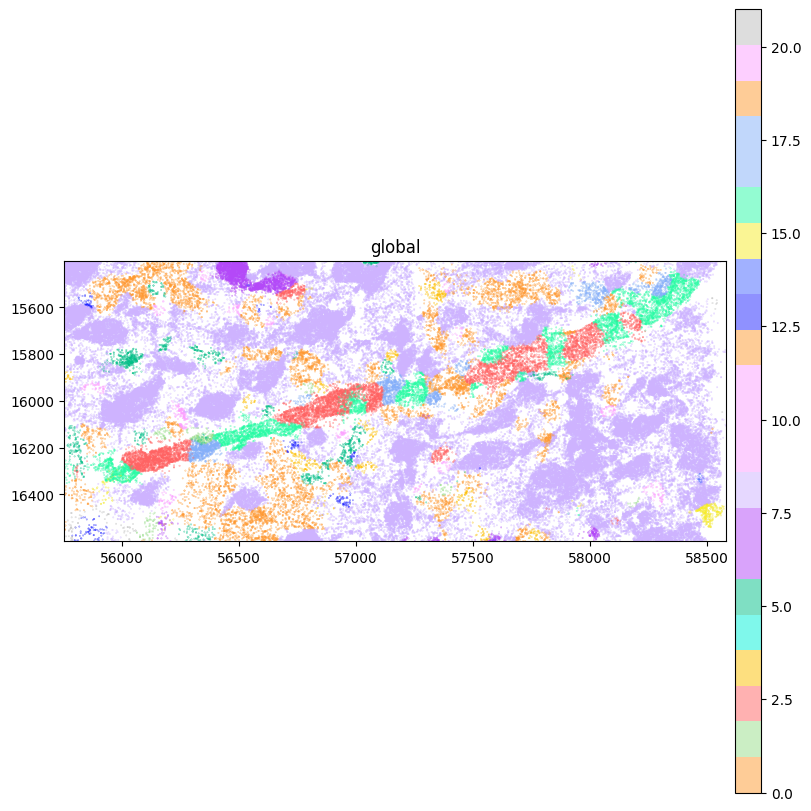

In [72]:
plot = cropped_sdata.pl.render_points(
    f"{sample_name}_all_transcript_factors",
    color=f"{factor}_factors",
    cmap=cmap,
    method="matplotlib",
    alpha=0.5,
    size=0.05,
).pl.show(figsize=(8, 8))

plot.pl.show(figsize=(18, 10))
plt.savefig(
    os.path.join(output_dir, f"{date_var}_{vname}_{boundary_name}.png"),
    dpi=500,
    bbox_inches="tight",
    pad_inches=0.2,
    transparent=False,
)

/dss/dsshome1/0C/ra98gaq/miniconda3/envs/sdata/lib/python3.11/site-packages/anndata/_core/anndata.py:401: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
/dss/dsshome1/0C/ra98gaq/miniconda3/envs/sdata/lib/python3.11/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/dss/dsshome1/0C/ra98gaq/miniconda3/envs/sdata/lib/python3.11/site-packages/spatialdata/_core/_elements.py:115: UserWarning: Key `foxf2_s2_r1_all_transcript_factors` already exists. Overwriting it in-memory.
  self._check_key(key, self.keys(), self._shared_keys)


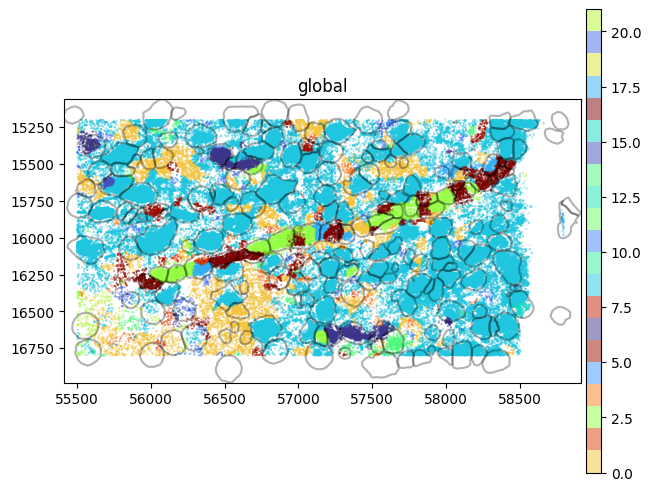

In [67]:
cropped_sdata.pl.render_points(
    f"{sample_name}_all_transcript_factors",
    color=f"{factor}_factors",
    cmap=cmap,
    method="matplotlib",
    alpha=0.5,
    size=0.05,
).pl.render_shapes(
    "Proseg_2D_boundaries", outline_alpha=0.5, outline_color="black", fill_alpha=0
).pl.show()

In [73]:
# define bounding box for spatial query for high res plotting
bb_xmin = 52800
bb_ymin = 35800
bb_w = 4300
bb_h = 1200
bb_xmax = bb_xmin + bb_w
bb_ymax = bb_ymin + bb_h

In [74]:
# spatial crop of sdata to enable high-res plotting
cropped_sdata2 = sdata.query.bounding_box(
    axes=["x", "y"],
    min_coordinate=[bb_xmin, bb_ymin],
    max_coordinate=[bb_xmax, bb_ymax],
    target_coordinate_system="global",
)

/dss/dsshome1/0C/ra98gaq/miniconda3/envs/sdata/lib/python3.11/functools.py:909: UserWarning: The object has `points` element. Depending on the number of points, querying MAY suffer from performance issues. Please consider filtering the object before calling this function by calling the `subset()` method of `SpatialData`.
  return dispatch(args[0].__class__)(*args, **kw)


/dss/dsshome1/0C/ra98gaq/miniconda3/envs/sdata/lib/python3.11/site-packages/anndata/_core/anndata.py:401: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
/dss/dsshome1/0C/ra98gaq/miniconda3/envs/sdata/lib/python3.11/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/dss/dsshome1/0C/ra98gaq/miniconda3/envs/sdata/lib/python3.11/site-packages/spatialdata/_core/_elements.py:115: UserWarning: Key `foxf2_s2_r1_all_transcript_factors` already exists. Overwriting it in-memory.
  self._check_key(key, self.keys(), self._shared_keys)


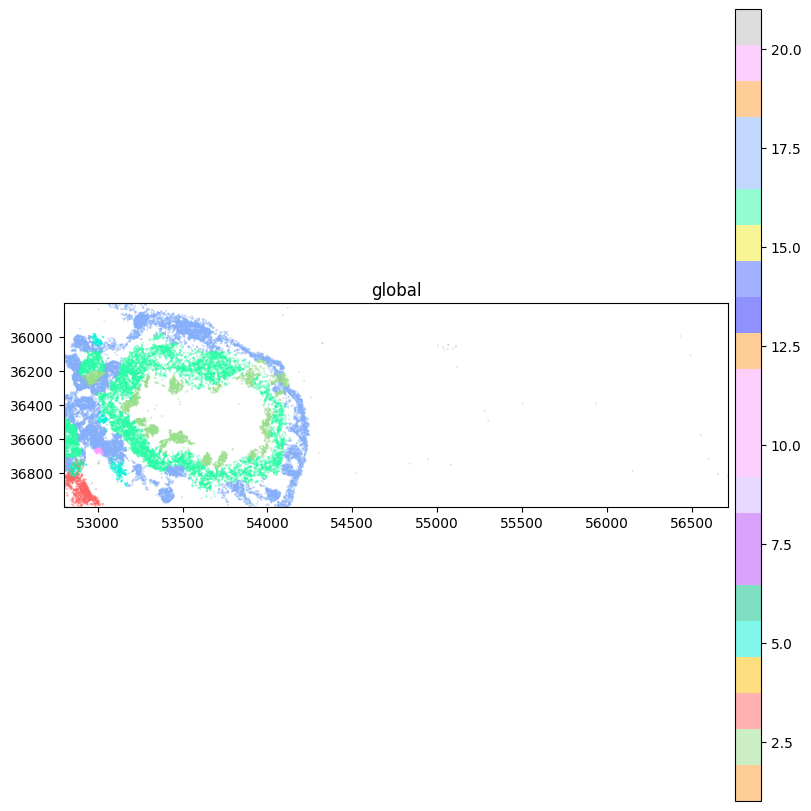

In [75]:
cropped_sdata2.pl.render_points(
    f"{sample_name}_all_transcript_factors",
    color=f"{factor}_factors",
    cmap=cmap,
    method="matplotlib",
    alpha=0.5,
    size=0.05,
    # ).pl.render_shapes(f"{sample_name}_polygons", outline_alpha=0.3, outline_color="black", fill_alpha=0
).pl.show(figsize=(8, 8))

In [24]:
#

In [ ]:
# arteriole
# pixel scale
vname = "arteriole1"
dotsize = 0.8
bb_xmin = 55700
bb_ymin = 15300
bb_w = 6800
bb_h = 1250
bb_xmax = bb_xmin + bb_w
bb_ymax = bb_ymin + bb_h